In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_csv="./data/train.csv"
test_csv="./data/test.csv"

train=pd.read_csv(train_csv, nrows = 1000000) #Sample only subset since dataset is very large
test=pd.read_csv(test_csv, nrows = 1000000)

In [3]:
train.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# Data cleaning

In [4]:
#train.info()
train = train.dropna() #Very few data entries are n/a so doesn't hurt to drop them

In [5]:
#First convert from python datetime object to pandas datetime obejct
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [6]:
#Seperate datetime object into year/month/day/hour

train['pickup_year'] = pd.DatetimeIndex(train['pickup_datetime']).year
train['pickup_month'] = pd.DatetimeIndex(train['pickup_datetime']).month
train['pickup_day'] = pd.DatetimeIndex(train['pickup_datetime']).day
train['pickup_day_of_week'] = pd.DatetimeIndex(train['pickup_datetime']).dayofweek
train['pickup_hour'] = pd.DatetimeIndex(train['pickup_datetime']).hour

train.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_day_of_week,pickup_hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [9]:
# Calculate distance of ride

# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


train['distance'] = \
    haversine( train['pickup_latitude'], train['pickup_longitude'],train['dropoff_latitude'], train['dropoff_longitude'] )

train.head(5)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_day_of_week,pickup_hour,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.999157


In [10]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_day_of_week,pickup_hour,distance
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941,2011.741103,6.267841,15.697996,3.039870,13.509463,19.090118
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907,1.860761,3.436230,8.682472,1.949966,6.513855,362.408033
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212942
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.115922
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.882433
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16878.303157


#### A few things to fix
##### passenger_count outlier 208 --> assume no more than 10 people per ride
##### negative fare_amounts
##### coordinates not within New York, i.e. long[40.4; 41] & lat[-73.6; -74.3]
##### distance must be greater than 0


In [11]:
train = train[train['fare_amount'] > 0]

train = train[ (train['pickup_longitude'] > 40.4)   &  (train['pickup_longitude'] < 41) ]
train = train[ (train['dropoff_longitude'] > 40.4)  &  (train['dropoff_longitude'] < 41) ]

train = train[ (train['pickup_latitude'] > -74.3)   &  (train['pickup_latitude'] < -73.6) ]
train = train[ (train['dropoff_latitude'] > -74.3)  &  (train['dropoff_latitude'] < -73.6) ]

train = train[train['passenger_count'] < 10]

train = train[train['distance'] > 0]

In [12]:
#train.boxplot(column='passenger_count', showfliers=False)
#train.loc[train['distance'] < 10]
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_day_of_week,pickup_hour,distance
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.0,486.000000,486.000000,486.000000,486.00000,486.000000
mean,12.658272,40.746504,-73.975504,40.749171,-73.971968,2.059671,2013.0,5.024691,23.170782,3.572016,13.37037,2.926015
std,9.920671,0.028870,0.038516,0.031393,0.035912,1.665458,0.0,0.179941,2.222112,1.581451,7.17805,3.990464
min,2.500000,40.641977,-74.016587,40.615782,-74.035197,1.000000,2013.0,5.000000,11.000000,0.000000,0.00000,0.018573
25%,7.000000,40.732944,-73.993846,40.732152,-73.990919,1.000000,2013.0,5.000000,22.000000,2.000000,8.00000,0.984257
50%,9.500000,40.748904,-73.984033,40.751427,-73.978864,1.000000,2013.0,5.000000,23.000000,4.000000,14.00000,1.668664
75%,14.375000,40.764243,-73.969486,40.766506,-73.964098,2.000000,2013.0,5.000000,25.000000,5.000000,20.00000,3.065218
max,60.000000,40.850357,-73.777107,40.851027,-73.746810,6.000000,2013.0,7.000000,26.000000,6.000000,23.00000,26.559941


# Visualize Data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_day_of_week,pickup_hour,distance
2147,2013-05-24 14:54:00.00000079,5.0,2013-05-24 14:54:00+00:00,40.751582,-73.986968,40.758867,-73.978353,2,2013,5,24,4,14,0.983675
3827,2013-06-20 04:28:00.0000001,11.0,2013-06-20 04:28:00+00:00,40.719830,-73.988467,40.723305,-73.939430,1,2013,6,20,3,4,5.453710
4783,2013-05-22 06:28:00.0000004,6.5,2013-05-22 06:28:00+00:00,40.748262,-73.991840,40.740372,-73.979010,1,2013,5,22,2,6,1.447017
6705,2013-05-22 15:33:00.000000175,13.0,2013-05-22 15:33:00+00:00,40.766125,-73.983285,40.757417,-73.977962,2,2013,5,22,2,15,0.649412
7525,2013-05-22 10:54:00.000000140,13.0,2013-05-22 10:54:00+00:00,40.760495,-73.973047,40.740367,-73.994392,1,2013,5,22,2,10,2.452474


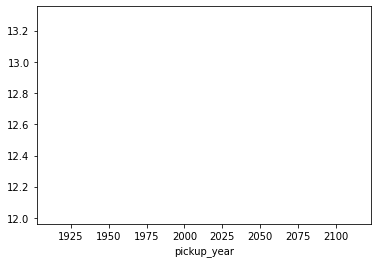

In [16]:
train.groupby('pickup_year')['fare_amount'].mean().plot()
train.head(5)

<AxesSubplot:xlabel='pickup_month'>

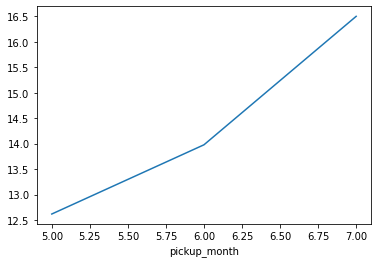

In [17]:
train.groupby('pickup_month')['fare_amount'].mean().plot()

<AxesSubplot:xlabel='pickup_day'>

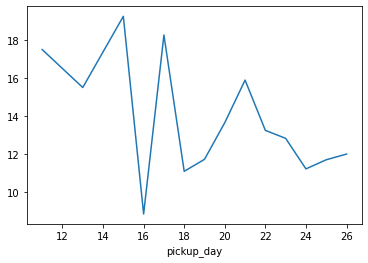

In [18]:
train.groupby('pickup_day')['fare_amount'].mean().plot()

In [ ]:
train.groupby('pickup_day_of_week')['fare_amount'].mean().plot()

In [ ]:
train.groupby('pickup_hour')['fare_amount'].mean().plot()

In [ ]:
plt.scatter(train['distance'], train['fare_amount'])
plt.xlabel("distance")
plt.ylabel("fare_amount")

In [ ]:
plt.scatter(train['passenger_count'], train['fare_amount'])

In [ ]:
train.corr()["fare_amount"].sort_values(ascending = False)

##### Fares have risen in the past couple of years
##### Fares are the lowest on staurday and highest on sundays
##### Fares are highest in the morning around 5 and another peak around 15 and 24
##### Longer distance seems to correlate with higer fares

In [ ]:
plt.hist(train['fare_amount'])

In [ ]:
plt.hist(train['passenger_count'])

##### Most rides are only 1 person

# Features

##### Day of week, time of day, distance seem like relevant to predict to fare amount

In [ ]:
plt.scatter(train['pickup_latitude'], train['pickup_longitude'], s=4) #Should look like map of New York